In [1]:
### Run this cell before continuing.
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
tail(players)
tail(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,28/08/2024 23:31,29/08/2024 00:15,1.72489e+12,1.72489e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


The dataset contains **196 observations**, each representing a unique individual who participated in a study involving an online Minecraft server. There are **7 variables** in total:

### Variables

| Variable        | Description |
|----------------|-------------|
| `experience`    | Self-reported skill level in Minecraft. One of: Beginner, Amateur, Regular, Pro, or Veteran. |
| `subscribe`     | Whether the participant chose to subscribe to a gaming-related newsletter (Yes/No). |
| `hashedEmail`   | A hashed version of the participant’s email address (used as a unique identifier). |
| `played_hours`  | The total number of hours the participant had played Minecraft at the time of data collection. |
| `name`          | The participant’s name. |
| `gender`        | The participant’s gender. |
| `Age`           | The participant’s age in years. |

| Variable              | Description |
|-----------------------|-------------|
| `hashedEmail`         | A hashed version of the participant’s email address (used as a unique identifier). |
| `start_time`          | The session start time, formatted as `dd/mm/yyyy hh:mm`. |
| `end_time`            | The session end time, formatted as `dd/mm/yyyy hh:mm`. |
| `original_start_time` | The raw numeric timestamp representing the start time (POSIX-style format). |
| `original_end_time`   | The raw numeric timestamp representing the end time. |

### Data Source and Collection Context

The data was collected from a free public Minecraft server operated by researchers at the University of British Columbia (UBC). The broader goal of this project was to gather behavioral and demographic information to support the eventual development of an AI agent capable of playing Minecraft.

### Data Quality Notes

Overall, the dataset appears to be of high quality. However, there are minor inconsistencies in variable naming conventions:
- Some variables use `snake_case` (e.g., `played_hours`), others use `camelCase` (e.g., `hashedEmail`), and some are inconsistently capitalized (e.g., `Age`).
- These inconsistencies are minor and do not affect the overall integrity or usability of the dataset.

### Cleaning and Merging the Data

First, we process the `sessions` dataset to calculate session-level summaries for each player:

- We convert `start_time` and `end_time` to date-time objects using `dmy_hm()`.
- We compute the session duration in hours by taking the difference between `end_dt` and `start_dt`, then dividing by 60.
- We group the data by `hashedEmail` to summarize sessions for each player.
- For each player, we calculate:
  - `total_session_time_hrs`: the total time played across all sessions.
  - `average_session_time_hrs`: the mean duration of a session.
  - `num_of_sessions`: the total number of sessions.
- We remove any rows where both `total_session_time_hrs` and `average_session_time_hrs` are missing.
- We select only the relevant summary columns for further analysis.

Next, we join the cleaned session summaries with the original `players` dataset using the `hashedEmail` key. This gives us a single dataset, `clean_players`, that contains both demographic and behavioral data.

Then, we do the following:

- Select only the columns we care about: `experience`, `subscribe`, `Age`, `total_session_time_hrs`, `average_session_time_hrs`, and `num_of_sessions`.
- Convert `experience` into an ordered factor so that the levels reflect increasing proficiency: Beginner < Amateur < Regular < Pro < Veteran.

This prepares the data for analysis and modeling by ensuring all variables are in a consistent, usable format.

In [3]:
clean_sessions <- sessions |>
    mutate(start_dt = dmy_hm(start_time),
           end_dt = dmy_hm(end_time),
           session_time_in_hrs = as.numeric(end_dt - start_dt) / 60) |>
    group_by(hashedEmail) |>
    summarise(total_session_time_hrs = round(sum(session_time_in_hrs), 2), 
              average_session_time_hrs = round(mean(session_time_in_hrs), 2),
              num_of_sessions = n()) |>
    filter(!is.na(total_session_time_hrs) | !is.na(average_session_time_hrs)) |>
    ungroup() |>
    select(hashedEmail, total_session_time_hrs, average_session_time_hrs, num_of_sessions)

clean_players <- merge(players, clean_sessions, by = "hashedEmail") |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))) |>
    select(experience, subscribe, Age, total_session_time_hrs, average_session_time_hrs, num_of_sessions)

clean_players

experience,subscribe,Age,total_session_time_hrs,average_session_time_hrs,num_of_sessions
<fct>,<lgl>,<dbl>,<dbl>,<dbl>,<int>
Regular,TRUE,20,1.77,0.88,2
Pro,FALSE,21,0.50,0.50,1
Beginner,TRUE,17,0.18,0.18,1
Regular,TRUE,17,6.97,0.54,13
Pro,TRUE,17,1.17,0.58,2
Veteran,FALSE,19,0.17,0.17,1
Amateur,TRUE,21,0.83,0.83,1
Amateur,TRUE,14,20.28,0.49,41
Beginner,FALSE,37,0.30,0.30,1


### Visualizing Player Experience and Session Activity

We created two visualizations to explore how player experience and session activity relate to subscription status:

- **Experience vs Proportion of Subscribers:**  
  A filled bar plot showing the proportion of subscribed vs non-subscribed players across different experience levels.

- **Number of Sessions vs Proportion of Subscribers:**  
  A filled histogram showing how subscription rates vary by the number of sessions played.

Both plots use a consistent color palette and minimalist theme for clarity.

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_bar()`).”


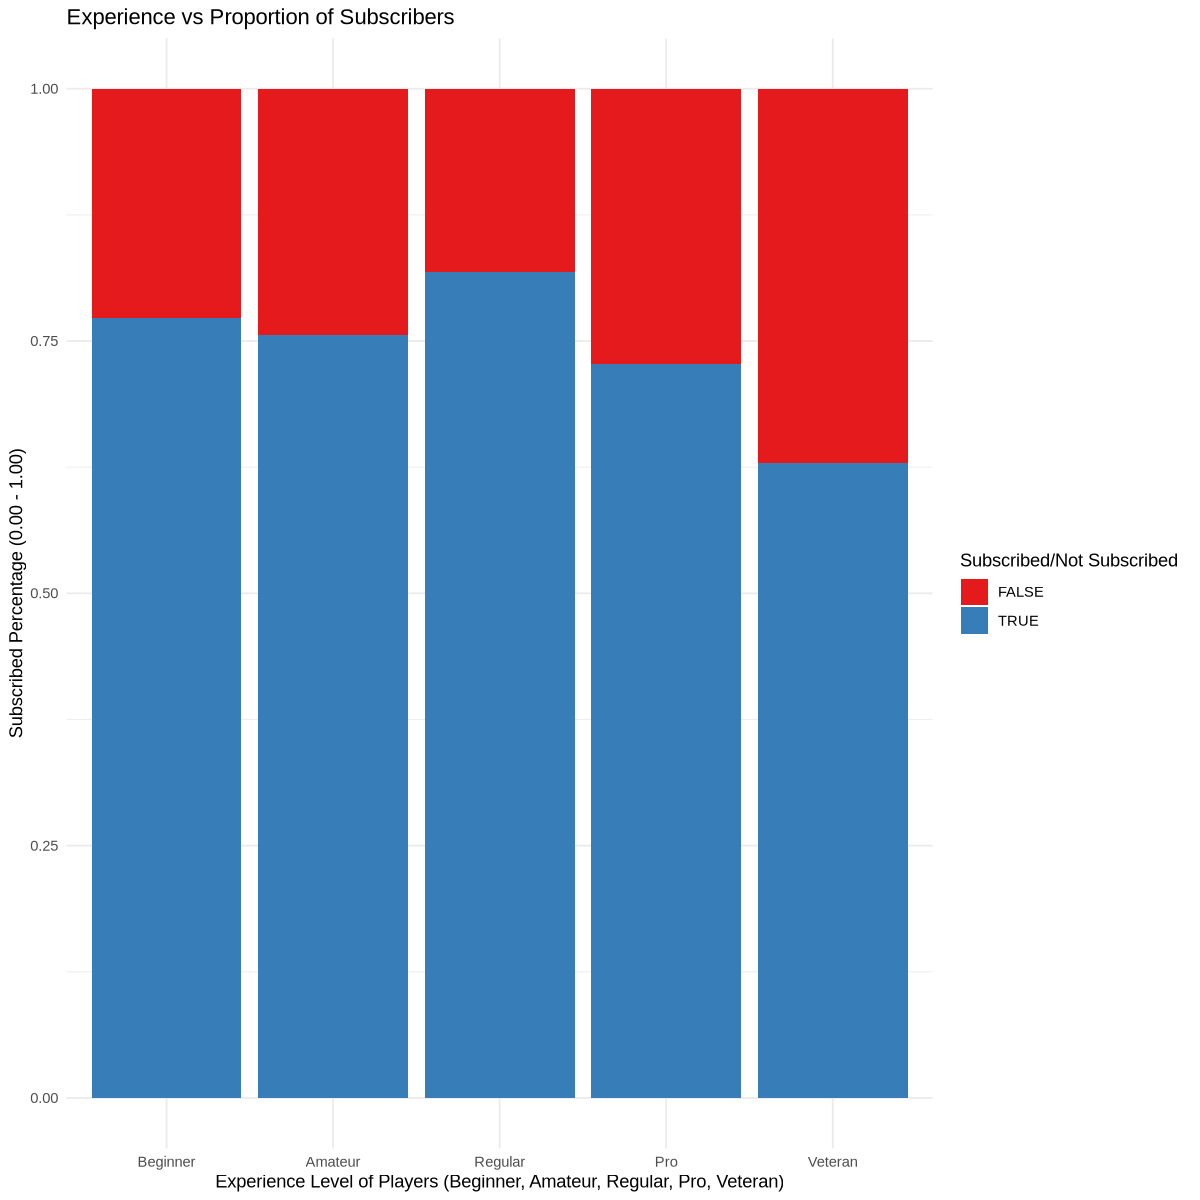

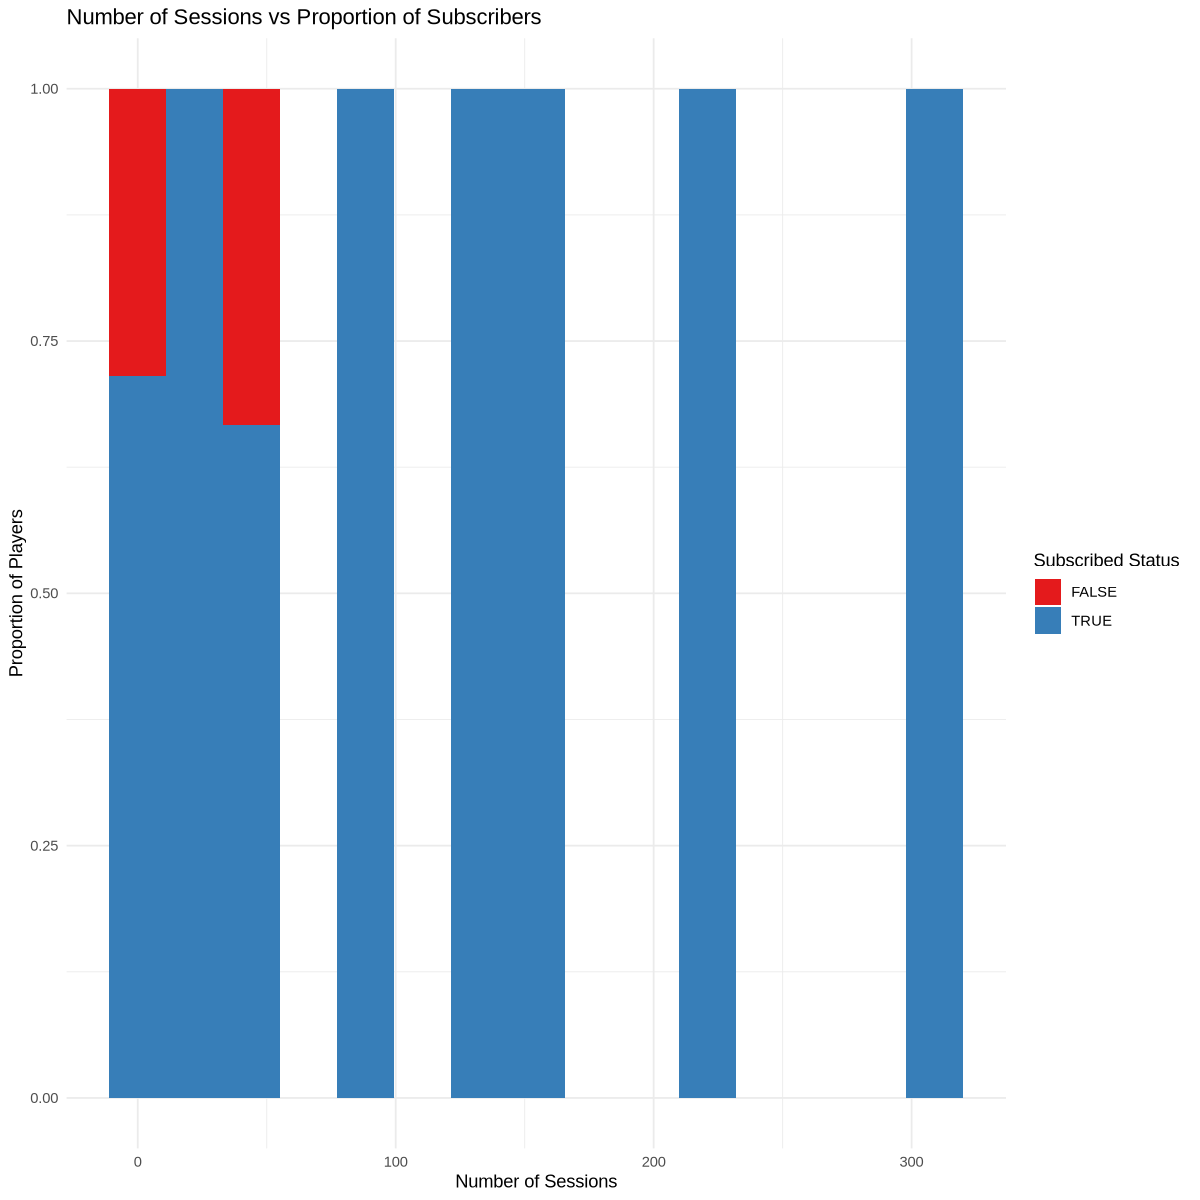

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10)

experience_vs_sub <- clean_players |>
    ggplot(aes(x = experience, fill = subscribe)) + geom_bar(position = "fill") +
    labs(x = "Experience Level of Players (Beginner, Amateur, Regular, Pro, Veteran)",
         y = "Subscribed Percentage (0.00 - 1.00)",
         fill = "Subscribed/Not Subscribed") +
    ggtitle("Experience vs Proportion of Subscribers") + 
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal()

session_freq_vs_sub <- clean_players |> 
    ggplot(aes(x = num_of_sessions, fill = subscribe)) +
    geom_histogram(position = "fill", bins = 15) +
    labs(x = "Number of Sessions",
         y = "Proportion of Players",
         fill = "Subscribed Status") +
    ggtitle("Number of Sessions vs Proportion of Subscribers") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal()

experience_vs_sub
session_freq_vs_sub

### Analysis of Visualizations

#### Experience vs Proportion of Subscribers

The bar plot shows the proportion of players who subscribed compared to those who did not, organized by experience level:

- **Subscription rates generally increase with experience level.**  
  Beginners and Amateurs have noticeably lower subscription rates, while Regular, Pro, and Veteran players tend to subscribe more often.
- This suggests that more experienced players may be more engaged or see greater value in subscribing.

#### Number of Sessions vs Proportion of Subscribers

The histogram displays the distribution of the number of sessions played, categorized by subscription status:

- **Players with more sessions are more likely to be subscribers.**  
  The proportion of subscribed players rises with the number of sessions.
- There is a clear trend showing that casual players with fewer sessions tend to be non-subscribers.
- This indicates that session frequency is a strong indicator of the likelihood of subscription.

### Summary

Both experience level and session frequency are positively linked to subscription

### Final Data Preparation for Modeling

We made two final adjustments to the `clean_players` dataset:

- We changed `subscribe` to a factor to ensure it is treated as a categorical variable in modeling.
- We changed `experience` from an ordered factor to a numeric variable, so it can be used as a quantitative predictor in the model.

In [5]:
clean_players = clean_players |>
    mutate(subscribe = as.factor(clean_players$subscribe),
           experience = as.numeric(clean_players$experience))

In [ ]:
Now we will create a k-Nearest Neighbors classification model to predict subscription based on experience level and age. 

We will start by dividing the dataset into training (75%) and testing (25%) subsets. 
Next, we will use 5-fold cross-validation on the training set to adjust the number of neighbors by checking values from 1 to 10. 
Then, we can use the testing data to determine the accuracy of this model.

[1] 7

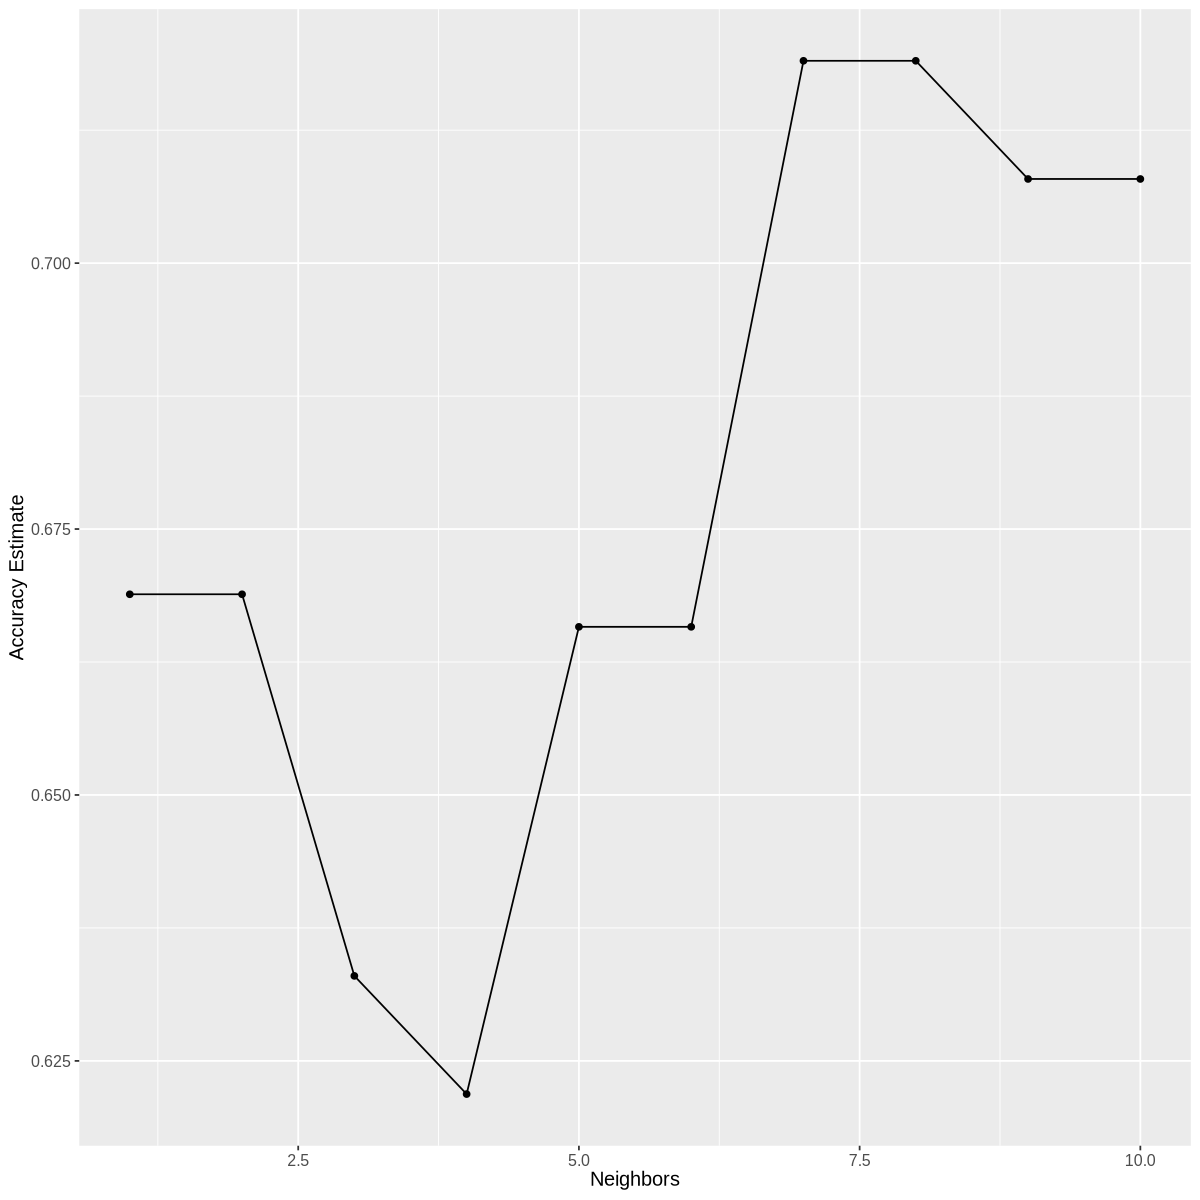

In [25]:
set.seed(1) # Ensures same best k value each time

players_split <- initial_split(clean_players, prop = 0.75, strata = subscribe)
players_training <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe ~ experience + average_session_time_hrs + num_of_sessions +
                         total_session_time_hrs,
                         data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

test_knn_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification")

training_vfold = vfold_cv(players_training, v = 5, strata = subscribe)
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(test_knn_spec) |>
    tune_grid(resamples = training_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy")

accuracy_vs_k <- accuracies  |>
    ggplot(aes(x = neighbors, y = mean)) + geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 12))

accuracy_vs_k
# Visually we can see that k = 7 is the best, 
# but we can also double check using the following:

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k


Train model using new found value of k.

In [26]:
players_tuned_spec = nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
    set_engine("kknn") |>
    set_mode("classification")

players_best_fit = workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_tuned_spec) |>
    fit(data = players_training)

Using our trained model, we evaluated predictions on the training data and found an accuracy of about 64.5% with the metrics() function. We tried different predictor variables and adjusted the number of neighbors (k), but this is still the highest accuracy we can achieve. This accuracy suggests that the model has limited predictive ability and is not an effective classifier for subscription status.

In [27]:
players_test_predictions <- predict(players_best_fit, players_test) |>
    bind_cols(players_test)

accuracy <- players_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6451613


Instead of focusing only on accuracy, let's create a confusion matrix to look at other important metrics like precision and recall. These metrics give us a better understanding of how the model performs, especially when class imbalance can impact accuracy.

In [28]:
levels(clean_players$subscribe) # Check which level comes first 

players_precision <- players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")
players_recall <- players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")

confusion <- players_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)

confusion

[1] "FALSE" "TRUE"

          Truth
Prediction FALSE TRUE
     FALSE     1    4
     TRUE      7   19

In [ ]:
The confusion matrix shows that the model correctly identified 19 subscribers (true positives) and only 1 non-subscriber (true negative).
However, it misclassified 7 non-subscribers as subscribers (false positives) and missed 4 actual subscribers by predicting them 
as non-subscribers (false negatives). This indicates that the model is much better at detecting subscribers than non-subscribers 
but tends to over-predict subscription status. Because of this imbalance, it's important to evaluate metrics like precision and 
recall for a better understanding of the model's performance beyond overall accuracy. Evaluating precision and recall gives more insight 
into how well the model works. The precision of the model is about 73%, meaning that when it predicts a player is subscribed, 
it is correct roughly 73% of the time. The recall is about 83%, indicating the model successfully identifies 83% of all actual 
subscribers. These results show that the model is fairly good at detecting subscribers, but there is still room to reduce false 
positives and false negatives.

**Discussion**

**Summary of findings:**  
The goal of this notebook was to see if we could predict subscriptions based on a player’s experience level and session activity. We began by looking at how many people subscribed at different experience levels and session frequencies. The plots showed some patterns. More experienced players were a bit more likely to subscribe, but the difference wasn’t strong. In contrast, the number of sessions and average session time had a clearer link: players who spent more time or had more sessions were more likely to subscribe. Next, we created a k-Nearest Neighbors (k-NN) model using three factors: experience level, number of sessions, and average session time. We wanted to find out if these factors could predict a player's subscription status. The model was trained using 5-fold cross-validation to adjust the number of neighbors (k), and the best result came with k = 7. However, even with the best k value, the model achieved only about 59% accuracy on the test set, which was lower than just guessing that everyone subscribed. This shows that the model had trouble telling subscribers apart from non-subscribers.

**Was This What We Expected?**

This result was mostly what we anticipated. Before the analysis, we thought that neither experience level nor session activity alone would strongly predict subscriptions. While session frequency did show some correlation, the model's performance confirmed our belief that it would be hard to create an accurate classifier with such limited inputs. The little variation in experience categories and the similarities in session patterns among users likely made it tougher for the model to identify useful patterns.

**What Impact Could These Findings Have?**

These results suggest that basic gameplay metrics like session count and experience level may not be enough by themselves to predict subscription behavior. For gaming companies or newsletter marketers, this means that more personalized or behavioral data could be essential for effectively targeting potential subscribers. It also shows the need to avoid relying too heavily on one or two user features when making marketing or product decisions.

**What Future Questions Could This Lead To?**

One important question raised by this analysis is whether we can use this information to better engage players and increase subscription rates. For example, if session activity is even slightly linked to subscription behavior, platforms could find highly active players and target them with personalized subscription prompts or incentives. Also, knowing which player types are more likely to subscribe could help shape marketing strategies. This could involve focusing on new but active players or those in specific age groups. Over time, combining behavioral data with user feedback could lead to engagement strategies that feel relevant and timely for each player, rather than generic or intrusive.